<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#чтение-фаила" data-toc-modified-id="чтение-фаила-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>чтение фаила</a></span></li><li><span><a href="#лемманизация" data-toc-modified-id="лемманизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>лемманизация</a></span></li><li><span><a href="#Выводы-анализа-данных:" data-toc-modified-id="Выводы-анализа-данных:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы анализа данных:</a></span></li></ul></li><li><span><a href="#Векторизация" data-toc-modified-id="Векторизация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Векторизация</a></span><ul class="toc-item"><li><span><a href="#векторизация-WordTo-vec" data-toc-modified-id="векторизация-WordTo-vec-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>векторизация WordTo vec</a></span></li><li><span><a href="#векторизация-TfidfVectorizer" data-toc-modified-id="векторизация-TfidfVectorizer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>векторизация TfidfVectorizer</a></span></li><li><span><a href="#векторизация-с-помощью-модели-BERT" data-toc-modified-id="векторизация-с-помощью-модели-BERT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>векторизация с помощью модели BERT</a></span></li></ul></li><li><span><a href="#Кроссвалидация-по-моделям" data-toc-modified-id="Кроссвалидация-по-моделям-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кроссвалидация по моделям</a></span></li><li><span><a href="#Обучение-с-помощью-текстовых-библиотек-Catboost" data-toc-modified-id="Обучение-с-помощью-текстовых-библиотек-Catboost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение с помощью текстовых библиотек Catboost</a></span></li><li><span><a href="#Классификация-с-помощью-модели-Word2vec" data-toc-modified-id="Классификация-с-помощью-модели-Word2vec-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Классификация с помощью модели Word2vec</a></span></li><li><span><a href="#Итоги-моделирования" data-toc-modified-id="Итоги-моделирования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги моделирования</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-итогам-моделирования:" data-toc-modified-id="Выводы-по-итогам-моделирования:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы по итогам моделирования:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')

In [2]:
import datetime
display(datetime.datetime.now())

datetime.datetime(2025, 5, 7, 14, 25, 24, 573512)

In [ ]:
# общие библиотеки Pandas
#from IPython.display import clear_output
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import string


from catboost import CatBoostClassifier, Pool
#from catboost.utils import get_confusion_matrix

import torch
import torch.nn as nn
import sparse
#from sparse import SparseTensor

from sklearn.metrics import f1_score 
#from sklearn.preprocessing import (StandardScaler,MinMaxScaler,OneHotEncoder) 
from sklearn.model_selection import (train_test_split,GridSearchCV,cross_val_score)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression,RidgeClassifier, SGDClassifier,PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.ensemble import RandomForestClassifier
#from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB

from wordcloud import WordCloud


#m = Mystem() 

import spacy
from spacy.lang.en import English
from scipy.sparse import hstack,coo_array, vstack,csr_matrix,coo_matrix
#spacy.load('en_core_web_sm')
!python -m spacy download en_core_web_sm
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords as nltk_sw
#from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist


import gensim
from gensim.models import Word2Vec,Doc2Vec
from gensim.utils import simple_preprocess
import gensim.downloader as api

from tqdm import notebook

import warnings
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')
import sys
import os

#random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

from numba import jit, cuda, njit 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
jit(target_backend='cuda') 
njit(parallel=True)



if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = ('ignore::UserWarning,ignore::ConvergenceWarning,ignore::RuntimeWarning')
    
#optuna.logging.set_verbosity(optuna.logging.WARNING)
    
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame.iteritems = pd.DataFrame.items
RANDOM_STATE = 255
TEST_SIZE = 0.20
vector_size=800
warnings.filterwarnings('ignore')

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()
print(f"Number of CPU cores: {cores}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
#print('device  :',device)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential

import transformers
from transformers import (BertModel,BertTokenizer, TFBertForSequenceClassification,DistilBertModel,DistilBertTokenizer)

In [ ]:
# лемманизация 

def lem_spa(text):
    jit(target_backend='cuda') 
    njit(parallel=True)
    physical_devices = tf.config.list_physical_devices('GPU') 
    
    text_lem = " ".join([token.lemma_ for token in nlp(text)
                         if (token.is_alpha
                             and not token.is_currency
                             and not token.is_digit
                             #and not token.is_oov
                             and not token.is_space
                             and not token.is_stop
                             and not token.like_num
                             and not token.is_punct 
                             and not token.lemma_ in stopwords
                             and not token.pos_ == "PROPN"
                             and not len(token.lemma_)<=1 )
                        ])       
       
    return (text_lem)

In [ ]:
# добавление признаков к данным

def add_dat(df):
    df['tokezied_text'] = df['lemm_text'].apply(lambda x: simple_preprocess(x))
    njit(parallel=True)
    #df = df.drop_duplicates('tokezied_text',ignore_index=True).copy()
    #df = df.dropna().copy()
       
    sia = SentimentIntensityAnalyzer()
    df['santim_3'] = df['lemm_text'].apply(lambda x : sia.polarity_scores(x)['compound'])
    df['santim'] = df['santim_3'].apply(lambda x : 'pos' if x>0.05 else 'neg' if x<-0.05 else 'neu')
    df['count_w'] = df['tokezied_text'].apply(lambda x : len(x))
    #df = df[df['count_w']>1].copy()
    display('значения в которых меньше слова ',df[df['count_w']<1])
    return (df)

In [ ]:
# добавление признаков к матрице предложений

def add_coo (X_c,X_t):
    
    X_c = hstack((X_c ,np.array(X_t['count_w'])[:,None]))
    X_c = hstack((X_c ,np.array(X_t['santim_3'])[:,None]))
    return X_c

In [ ]:
# фукция параметров кросвалидации моделей
def cv_model(clf,X_train,y_train,X_test,vec):
        
    physical_devices = tf.config.list_physical_devices('GPU')  
    param_grid = {}
    if clf.__class__.__name__ == 'LinearSVC' :
        param_grid = {'models__tol': np.arange(0.001, 0.01, 0.006),
                     'models__C':np.arange(0.1, 1.2, 0.3) }
        
    elif clf.__class__.__name__ == 'GaussianNB' :
        X_train = X_train.toarray()
        X_test = X_test.toarray()
        
    elif clf.__class__.__name__ == 'RidgeClassifier' :
        param_grid = {'models__alpha': np.arange(0.01, 0.1, 0.05),
                     'models__tol': np.arange(0.001, 0.01, 0.05)}
    elif clf.__class__.__name__ == 'LogisticRegression' :
        param_grid = {'models__C': np.arange(0.1, 5.3, 0.3),
                      'models__solver' :([ 'saga'])}

    else  : param_grid = {} 
    #display (X_train,X_test)
    pipe_final = Pipeline([('models',clf)])
    GridCV = GridSearchCV(
        pipe_final,
        param_grid=param_grid, 
        cv=3,
        scoring='f1',
        error_score='raise',
        verbose=False,
        n_jobs=-1
    )
    GridCV.fit(X_train, y_train)
    clf_descr = clf.__class__.__name__
        
    print
    print(clf_descr)
    print(f"best parames :   {GridCV.best_params_}")
    print(f"best score :   {GridCV.best_score_}")
        
    #pred = GridCV.best_estimator_.predict(X_test)
    score = GridCV.best_score_ #f1_score(y_test, pred)
    
    return (clf_descr, score,vec)

In [ ]:
# кросвалидация моделей

def cross_m (X_tr,y_train,X_ts,vec):
    physical_devices = tf.config.list_physical_devices('GPU')
    results = []
    for clf in (
        (GaussianNB()),
        (PassiveAggressiveClassifier(max_iter=1000,tol=1e-4,random_state=RANDOM_STATE)),
        (LogisticRegression(C=0.01, max_iter=500)),
        (RidgeClassifier(max_iter=500,random_state=RANDOM_STATE)),#,solver="sparse_cg")),
        (KNeighborsClassifier(n_neighbors=60)),
        (RandomForestClassifier()),
        (LinearSVC(random_state=RANDOM_STATE,max_iter=500)), #,cache_size=8000,gamma='auto',probability=True,
        (SGDClassifier(loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True)),
        (NearestCentroid())):
        #(CatBoostClassifier(iterations=600, learning_rate=0.05, depth=6,
        #                    loss_function='Logloss',eval_metric='F1',
        #                    random_seed = RANDOM_STATE,
        #                    early_stopping_rounds = 450,
        #                    verbose= False))):
        print("=" * 80)
        
        #model_name,m_score = (cv_model(clf,X_tr,X_ts))
        results.append(cv_model(clf,X_tr,y_train,X_ts,vec) )
    return results


### чтение фаила

In [ ]:
try :
    df1 = pd.read_csv('C:/Users/rs_mi/yandex-praktikum-projects/new/toxic_comments.csv' ,
                      usecols = ['text','toxic'],
                      dtype = ({'text':'str','toxic':'int8'}),
                      index_col=[0],
                      encoding ='utf-8'
                      )
except:    
    df1 = pd.read_csv('/datasets/toxic_comments.csv' ,
                      usecols = ['text','toxic'],
                      dtype = ({'text':'str','toxic':'int8'}),
                      index_col=[0],
                      encoding ='utf-8'
                      )
df1=df1.reset_index()
df1['text'] = df1['text'].apply(lambda x: x.lower())
#df['text'] = df['text'].astype('string')
display(df1.head())
df1.info()


### лемманизация

In [ ]:
jit(target_backend='cuda') 
njit(parallel=True)
nlp = spacy.load ('en_core_web_sm')
stop_word_add_spa = {'www','jpg','hi','utc','etc','yum'}
nlp.Defaults.stop_words |= stop_word_add_spa
stopwords = nlp.Defaults.stop_words #|= stop_word_add_spa # nltk.corpus.stopwords.words('english')

df1['lemm_text'] =  df1['text'].apply(lambda x: lem_spa(x))

In [ ]:
df1 = df1.drop_duplicates('lemm_text',ignore_index=True).copy()
df1 = df1[df1['lemm_text']!=''].copy()
df1 = df1.dropna().copy()
display(df1.head())
df1.to_csv('df1_lem.csv',index=False) 
df1.info()
#display (df1.head())

In [ ]:
df1 = pd.read_csv('df1_lem.csv' )

X_train0, X_test, y_train0, y_test = train_test_split(
    df1.drop(['toxic'],axis=1),
    df1['toxic'],
    test_size = 0.2, 
    random_state = RANDOM_STATE,
    stratify = df1['toxic'])
X_train0 = X_train0.drop(['text'],axis=1).copy()
X_test = X_test.drop(['text'],axis=1).copy()


# в данной работе принято решение уменьшить данные еще раз
X_train, X_train2t, y_train, y_train2t = train_test_split(
    X_train0,
    y_train0,
    test_size = 0.5, 
    random_state = RANDOM_STATE,
    stratify = y_train0)

In [ ]:
X_train0.info()
y_train0.info()
X_train.info()
y_train.info()
X_test.info()
y_test.info()

In [ ]:
X_train = add_dat(X_train).copy()
X_test = add_dat(X_test).copy()

X_train0 = add_dat(X_train0).copy()


df2 = add_dat(df1.drop(['text'],axis=1).copy())
df2.info()

#df2.to_csv('df2_lem_tok.csv',index=False) 

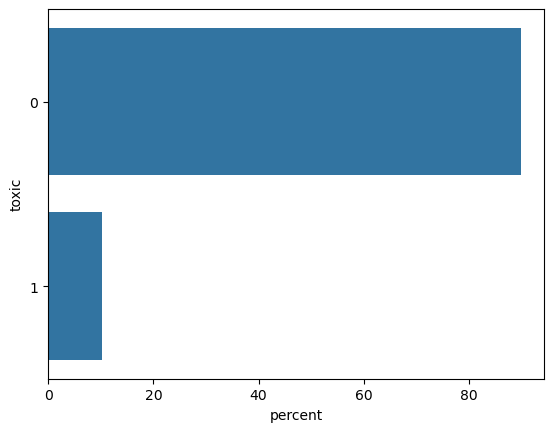

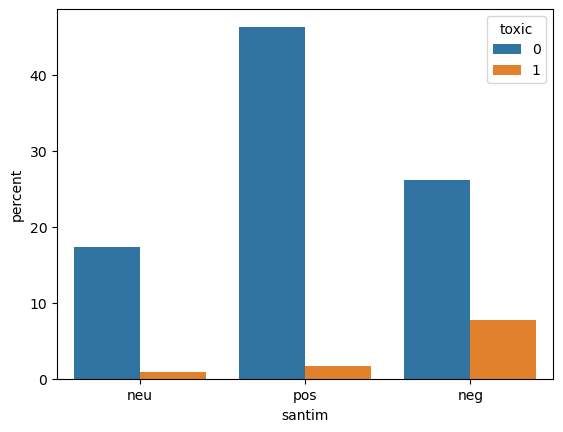

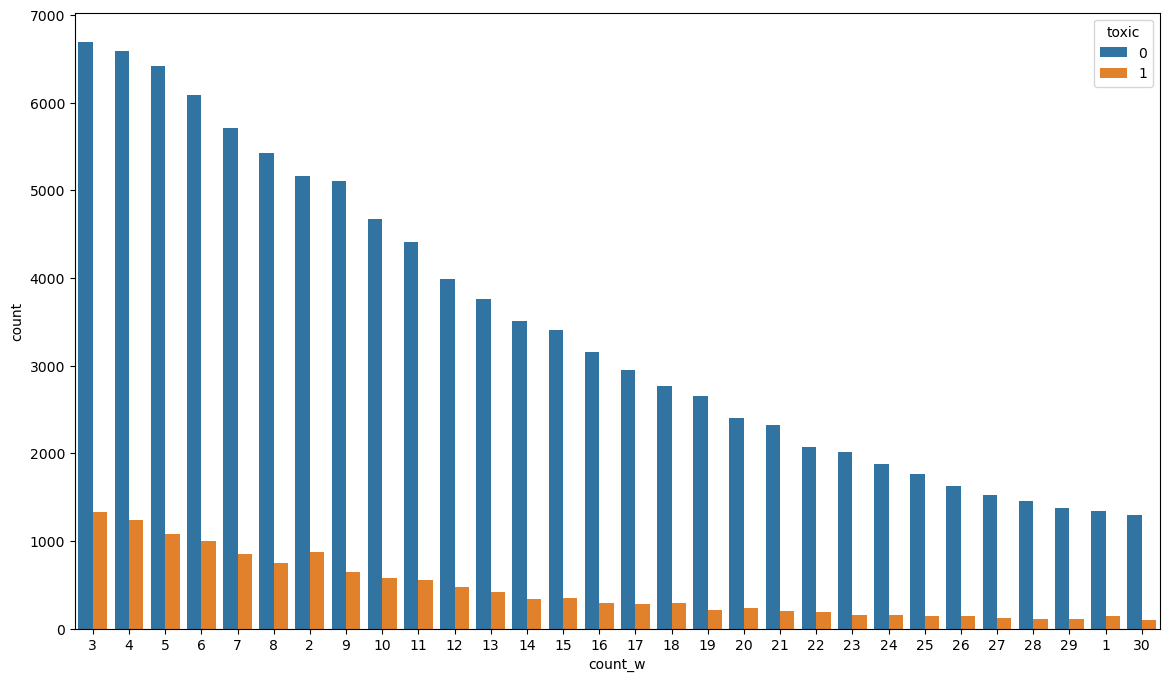

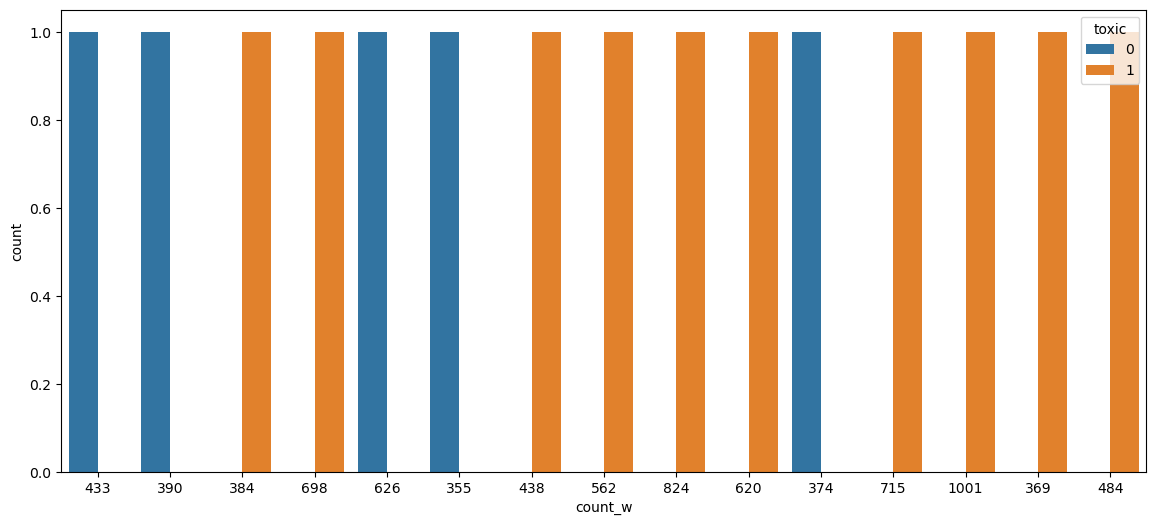

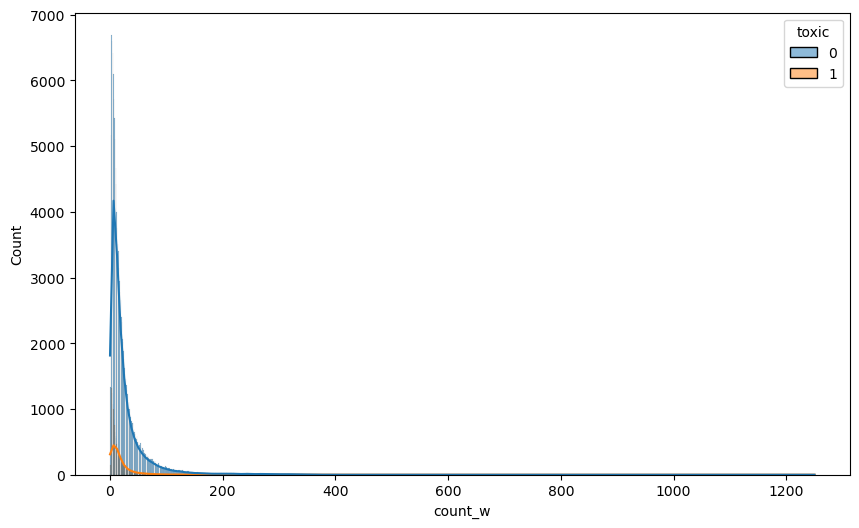

In [15]:
#df2 =  pd.read_csv('df2_lem_tok.csv')

#df_df=df2.join(y_train)#[['lemm_text','tokezied_text','toxic','santim','count_w']].copy()
df_df=df2.copy()
display(df_df['toxic'].value_counts())
sns.countplot(y='toxic',data=df_df,stat='percent')
plt.show()         

display(df_df['santim'].value_counts())
sns.countplot(x='santim', hue='toxic',data=df_df,stat='percent')
plt.show()         

print ('количество слов в посте')
plt.figure(figsize=(14,8))
sns.countplot(x='count_w', hue='toxic',data=df_df,
              order=df_df.count_w.value_counts().iloc[:30].index)
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(x='count_w', hue='toxic',data=df_df,
              order=df_df.count_w.value_counts().iloc[430:].index)
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(x='count_w',hue='toxic',data=df_df,kde=True)
plt.show()
#display(df_df['tokezied_text'][df_df['count_w'].value_counts()<=2])

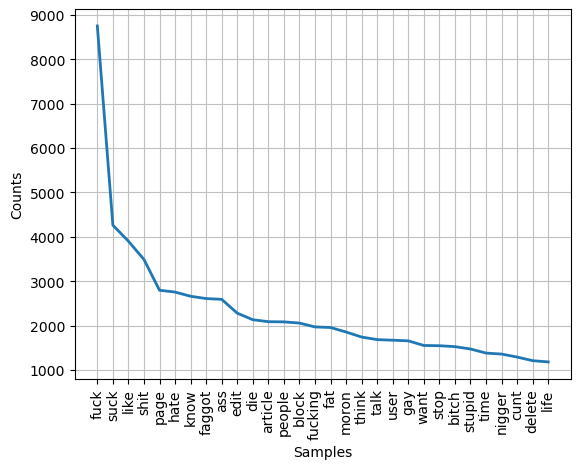

In [16]:
# анализ "токсичных" постов
dd_t=df_df['tokezied_text'][df_df['toxic']==1]

jit(target_backend='cuda') 
njit(parallel=True)
de_t=dd_t.sum() 

fdist = FreqDist(de_t)
display(fdist.most_common(15))
fdist.plot(30,cumulative=False)

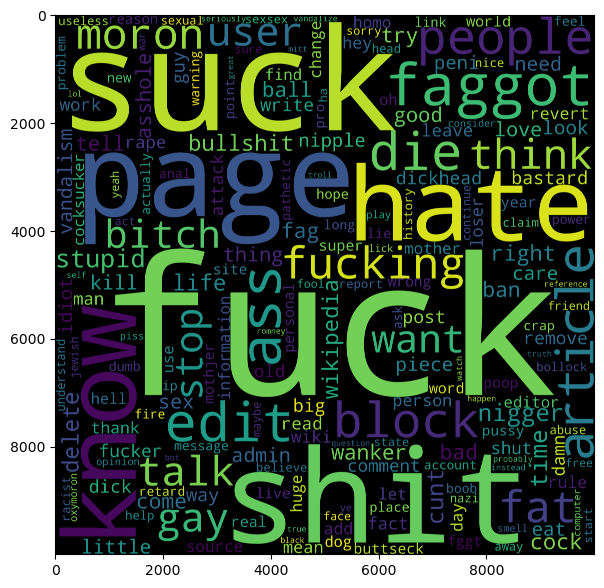

In [17]:
from wordcloud import WordCloud
#import matplotlib.font_manager as fm 
#font_list=fm.findSystemFonts() for font in font_list: print(font)

%matplotlib inline

text_raw = " ".join(de_t)
wordCloud = WordCloud(width = 10000,
                      height = 10000,
                      random_state=1,
                      background_color='black',
                      #colormap='Set2',
                      collocations=False).generate(text_raw)

plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.show()

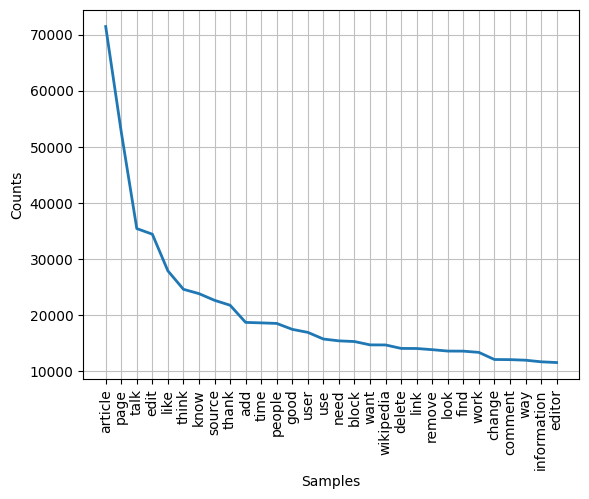

In [20]:
jit(target_backend='cuda') 
njit(parallel=True)
de=df2['tokezied_text'].sum() 
fdist = FreqDist(de)
display(fdist.most_common(15))
fdist.plot(30,cumulative=False)

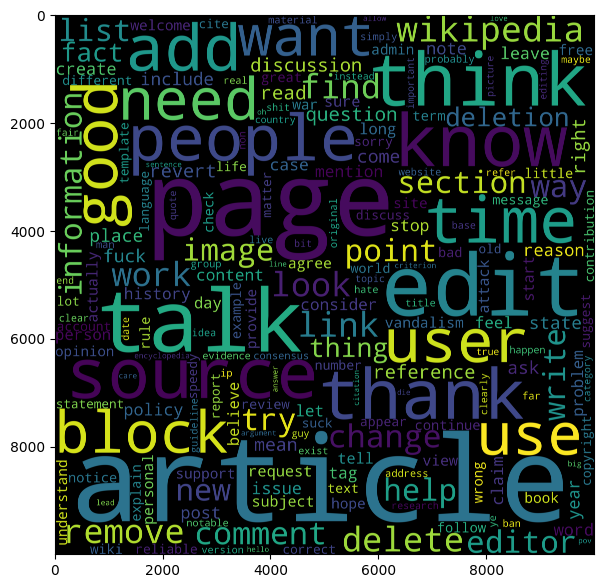

In [21]:
from wordcloud import WordCloud
#import matplotlib.font_manager as fm 
#font_list=fm.findSystemFonts() for font in font_list: print(font)

%matplotlib inline

text_raw = " ".join(de)
wordCloud = WordCloud(width = 10000,
                      height = 10000,
                      random_state=1,
                      background_color='black',
                      #colormap='Set2',
                      collocations=False).generate(text_raw)

plt.figure(figsize=(7,7))
plt.imshow(wordCloud)
plt.show()

### Выводы анализа данных:
 - токсичных сообщений в данных почти в десять раз больше, чем положительных
 - сообщения , имеющие "негативную" эмоциональную окраску более токсичны
 - большинство токсичных сообщений имеют небольшую длину "значимых" слов
 - доля токсичных сообщений среди длиных сообщения ( с длинной более 500 слов) высока (самих таких соообщенйи мало и среди них чаще токсичные)
 - часто в токсичных отзывах содержатся слова типа 'dieeeeeeeeeeeeeeeeeeeee'
 - токсичные сообщения "пестрят" нецензурными словами
 - наиболее частые слова : 'article','page' 'talk'

## Векторизация 

Рассмотрим, как различные методы решают эту задачу и чем они отличаются друг от друга.

 - Статические и динамические. Статические модели, такие как Word2Vec, создают фиксированные эмбеддинги для каждого слова, что ограничивает точность при обработке слов с множественными значениями.
 - Динамические модели, такие как BERT, создают эмбеддинги, адаптированные к контексту, что позволяет точнее различать разные значения слов и учитывать взаимосвязи. Учёт контекста помогает моделям точно различать слова с разными значениями. Например, слово «ключ» может означать как инструмент для открытия замка, так и источник воды. Контекстные модели, такие как BERT, анализируют окружение слова и создают различные числовые представления для каждого значения. Это важно для работы с полисемией — ситуации, когда одно слово имеет несколько значений.
 - Анализ структуры слов. Некоторые модели, например, FastText, анализируют внутреннюю структуру слов и используют части слов, что помогает работать с новыми или редкими словами. Это особенно важно для языков с развитой морфологией или при обработке текстов, где встречаются опечатки и неформальные слова.
Способность учитывать глобальные и локальные взаимосвязи. Влияет на способность модели учитывать смысл текста на уровне всего корпуса данных. Модели, такие как GloVe, фиксируют глобальные взаимосвязи между словами на уровне больших массивов текстов. Это позволяет им выявлять скрытые связи между словами и темами.
 - Назначение и масштаб. Модели для создания  универсальных эмбеддингов, такие как GTE и E5, разработаны для выполнения широкого круга задач, включая классификацию, поиск и кластеризацию, что позволяет эффективно использовать их в различных приложениях без необходимости дообучения на специализированных наборах данных.

### векторизация WordTo vec


In [85]:
#векторихация WordToVec с добавлением признаков
physical_devices = tf.config.list_physical_devices('GPU')
sentences = [sentence.split() for sentence in X_train['lemm_text']]
w2v_model = Word2Vec(sentences, vector_size=vector_size, window=4, min_count=6, workers=cores-1)# 

#Building the Vocabulary Table
w2v_model.build_vocab(sentences)

#train mpdel W2w
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30)

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(vector_size)
    words_vecs = np.array(words_vecs)#
    return words_vecs.mean(axis=0)
    
def word_coo_add (X_c):
    X_w_s = coo_matrix(np.array ([(vectorize(sentence)) for sentence in X_c['lemm_text']]))
    return X_w_s
    

#word_pipe = Pipeline(    [('word_vec', word_coo_add) ] )

In [86]:
X_train_ww_s = add_coo(word_coo_add(X_train),X_train).copy()
X_test_ww_s = add_coo(word_coo_add(X_test),X_test).copy()
#X_test_ww_s = word_pipe( X_test)

### векторизация TfidfVectorizer

In [83]:
# векторизация TfidfVectorizer
jit(target_backend='cuda') 
njit(parallel = True)
physical_devices = tf.config.list_physical_devices('GPU')
count_tf_idf = TfidfVectorizer(ngram_range=(1, 5),max_features=vector_size,stop_words= 'english') #ngram_range=(2, 2),
tf_idf_X_train = count_tf_idf.fit_transform(X_train0['lemm_text'])
tf_idf_X_test = count_tf_idf.transform(X_test['lemm_text'])
#display(tf_idf_train)

In [84]:
tf_idf_X_train  = add_coo(tf_idf_X_train,X_train0).copy()
tf_idf_X_test  = add_coo(tf_idf_X_test,X_test).copy() 

### векторизация с помощью модели BERT

In [92]:
X_train_bert = X_train.copy()
X_test_bert = X_test.copy()

In [101]:
jit(target_backend='cuda') 
njit(parallel = True)
max_len = 200  # vector_size
model_class, tokenizer_class, pretrained_weights = (transformers.AutoModel, #transformers.DistilBertModel,
                                                    transformers.AutoTokenizer, 'unitary/toxic-bert') #transformers.DistilBertTokenizer

## Хотите BERT вместо distilBERT? Раскомментируйте следующую строку:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Загрузка предобученной модели/токенизатора 
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model_bert = model_class.from_pretrained(pretrained_weights)

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',vocab_file='vocab.txt')#transformers.BertTokenizer()
tokenized_train = X_train['lemm_text'].apply(lambda x: tokenizer.encode(x,truncation=True,padding=True,
                                                                        max_length=max_len,
                                                                        add_special_tokens=True,))
                                                                        #return_tensors='tf' ))
tokenized_test = X_test['lemm_text'].apply(lambda x: tokenizer.encode(x,truncation=True,padding=True,
                                                                      max_length=max_len,
                                                                      add_special_tokens=True,))
                                                                      #return_tensors='tf' ))

In [102]:
# создаем векторы одинаковой длинны и массив mask

#jit(target_backend='cuda') 
njit(parallel=True)
def pad_att (tokenized):
    physical_devices = tf.config.list_physical_devices('GPU')
    max_len = 0
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)
    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    return (attention_mask,padded)    

attention_mask_train,padded_train  = pad_att(tokenized_train)
attention_mask_test,padded_test  = pad_att(tokenized_test)

In [103]:
#содание финальных эмбендингов
physical_devices = tf.config.list_physical_devices('GPU')

jit(target_backend='cuda') 
njit(parallel=True)


def bat_x (padded,attention_mask):
    physical_devices = tf.config.list_physical_devices('GPU')
    #model_bert.to(device)
    #token_ids = torch.tensor(padded_train).to(device)
    #attentionMask = torch.tensor(attention_mask_train).to(device)    

    
    batch_size = 32
    embeddings = []
    jit(target_backend='cuda') 
    njit(parallel=True)
    for i in  notebook.tqdm(range(padded.shape[0] // batch_size)):
        
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model_bert(batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
    ost = padded.shape[0] % batch_size    
    if ost !=0 :
        batch = torch.LongTensor(padded[padded.shape[0] - ost:padded.shape[0]]) 
        attention_mask_batch = torch.LongTensor(attention_mask[padded.shape[0] - ost:padded.shape[0]])
        
        with torch.no_grad():
            batch_embeddings = model_bert(batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
        
    features = np.concatenate(embeddings)    
    return (features)

In [104]:
jit(target_backend='cuda') 
njit(parallel=True)
physical_devices = tf.config.list_physical_devices('GPU')
X_train_bertv = bat_x(padded_train,attention_mask_train)
X_test_bertv = bat_x(padded_test,attention_mask_test)
display(padded_test.shape[1])

In [105]:
X_train_bertc = coo_matrix(X_train_bertv) 
X_test_bertc = coo_matrix(X_test_bertv)


In [106]:
X_train_bertc = add_coo(X_train_bertc,X_train).copy()
X_test_bertc = add_coo(X_test_bertc,X_test).copy() 

## Кроссвалидация по моделям

In [110]:
jit(target_backend='cuda') 
njit(parallel=True)
results_word = cross_m(X_train_ww_s,y_train,X_test_ww_s,'WordVec')

In [91]:
jit(target_backend='cuda') 
njit(parallel=True)
physical_devices = tf.config.list_physical_devices('GPU')
results_tf = cross_m(tf_idf_X_train,y_train0,tf_idf_X_test,'TFV' )

In [107]:
jit(target_backend='cuda') 
njit(parallel=True)
results_bert = cross_m(X_train_bertc,y_train,X_test_bertc,'BERT' )

In [111]:
display('test F1 WordToVec' , results_word)
display('test F1 TFV' , results_tf)
display('test F1 BERT' , results_bert)

## Обучение с помощью текстовых библиотек Catboost 

In [19]:
# создание словаря слов
jit(target_backend='cuda') 
njit(parallel=True)
def build_dictionary(tokenized_texts):
    dictionary = {}
    for text in tokenized_texts:
        for token in text:
            if token not in dictionary:
                size = len(dictionary)
                dictionary[token] = size
    return dictionary

# создание "мешка" слов - векторизация слов
def bag_of_words(texts, dictionary):
    encoded_vectors = []
    dictionary_size = len(dictionary)

    for text in texts:
        vector = [0] * dictionary_size

        for token in text:
            if token in dictionary:
                token_id = dictionary[token]
                vector[token_id] = 1
    
        encoded_vectors.append(vector)    
    return encoded_vectors

# создание словаря биграмм 
def build_bigram_dictionary(tokenized_texts):
    dictionary = {}
    for text in tokenized_texts:
        for i in range(len(text) - 1):
            token1, token2 = text[i], text[i + 1]
            bigram = token1 + ' ' + token2
            
            if bigram not in dictionary:
                dictionary_size = len(dictionary)
                dictionary[bigram] = dictionary_size

    return dictionary

# создание матрицы
def fit_naive_bayes(X, c):
    clf = MultinomialNB()
    if isinstance(X, csr_matrix):
        X.eliminate_zeros()
    clf.fit(X, c)
    return clf

dictionary = build_dictionary(X_train0['lemm_text'])
bow_features = bag_of_words(X_train0['lemm_text'], dictionary)
bigram_word_dictionary = build_bigram_dictionary(X_train0['lemm_text'])

In [20]:
jit(target_backend='cuda') 
njit(parallel=True)

cat_features = ['santim' ]
text_features = ['lemm_text']#,'tokezied_text'
X_train_cat = X_train0
X_test_cat = X_test
X_train_cat = X_train_cat.drop(['tokezied_text'],axis=1).copy()
X_test_cat = X_test_cat.drop(['tokezied_text'],axis=1).copy()
learn_pool = Pool(
        X_train_cat, 
        y_train0, 
        cat_features=cat_features,
        text_features=text_features,
        #feature_names=np.append(count_tf_idf.get_feature_names_out(),['count_w','santim_3'])#list(X_train_cat)
    )

test_pool = Pool(
    X_test_cat, 
    y_test, 
    cat_features=cat_features,
    text_features=text_features,
    #feature_names=np.append(count_tf_idf.get_feature_names_out(),['count_w','santim_3'])#list(X_test_cat)
)

In [21]:
# вариант индивидуального catboost 
jit(target_backend='cuda') 
njit(parallel=True)

params = {
    'iterations': 2000,
    'learning_rate': 0.02,
    'loss_function': 'Logloss',
    'eval_metric' : 'F1',
    'early_stopping_rounds': 460,
    #'dictionaries': dictionary,#bigram_word_dictionary], #['Word:min_token_occurrence=5','BiGram:gram_order=2'],
    'text_processing': ['NaiveBayes+Word|BoW:top_tokens_count=1000+Word,BiGram|BM25+Word'],
    'task_type' : 'GPU',    
    #'devices' : device,
    'verbose': False,  
    'text_features' : text_features,
    'random_seed': RANDOM_STATE,
    'cat_features' : cat_features 
    }


model_cat = CatBoostClassifier(**params)#,**cat_params_dic)
model_cat.fit(learn_pool, eval_set=test_pool)
display('лучшая метрика F1',model_cat.get_best_score())  

## Классификация с помощью модели Word2vec

In [12]:
# Классифиуация с помощью модели Worf2wec

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.backend import epsilon
#physical_devices = tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('CPU')
jit(target_backend='cuda') 
njit(parallel=True)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['lemm_text'])

X_train_ww = tokenizer.texts_to_sequences(X_train['lemm_text'])
X_test_ww = tokenizer.texts_to_sequences(X_test['lemm_text'])
#display(X_test_ww )
vocab_size = len(tokenizer.word_index) + 1

# Pad the sequences to a fixed length
max_length = vector_size
X_train_ww = pad_sequences(X_train_ww, maxlen=max_length, padding='post')
X_test_ww = pad_sequences(X_test_ww, maxlen=max_length, padding='post')

# Train the Word2Vec model
sentences = [sentence.split() for sentence in X_train['lemm_text']]
w2v_model = Word2Vec(sentences, vector_size=vector_size, window=4, min_count=5, workers=cores-1)
#w2v_model.to(device)

# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, max_length))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [13]:
# Define the CNN model
physical_devices = tf.config.list_physical_devices('GPU')
#physical_devices = tf.config.list_physical_devices('CPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

CNN_model = Sequential()
CNN_model.add(Embedding(vocab_size, vector_size, weights=[embedding_matrix], input_length=max_length, trainable=False))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(5))
CNN_model.add(Conv1D(128, 5, activation='relu'))
CNN_model.add(MaxPooling1D(5))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

def f1_score2(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + epsilon()))

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['f1_score']) #metrics=['f1_score']

#X_train_ww = torch.tensor(X_train_ww).to(device)
#y_train =  torch.tensor((y_train)).to(device) 
                #torch.tensor(np.array(y_train)).to(device)
#X_test_ww = torch.tensor(X_test_ww).to(device)
#y_test = torch.tensor((y_test)).to(device)
#CNN_model.to(device)


CNN_model.fit(X_train_ww, y_train, epochs=10, batch_size=64, validation_data=(X_test_ww, y_test))

In [14]:
pred = CNN_model.predict(X_train_ww)
score = f1_score2(y_train,pred)
print(f"F1 train : {score:.3}")

In [15]:
pred = CNN_model.predict(X_test_ww)
score = f1_score2(y_test,pred)
print(f"F1 test : {score:.3}")

## Итоги моделирования 

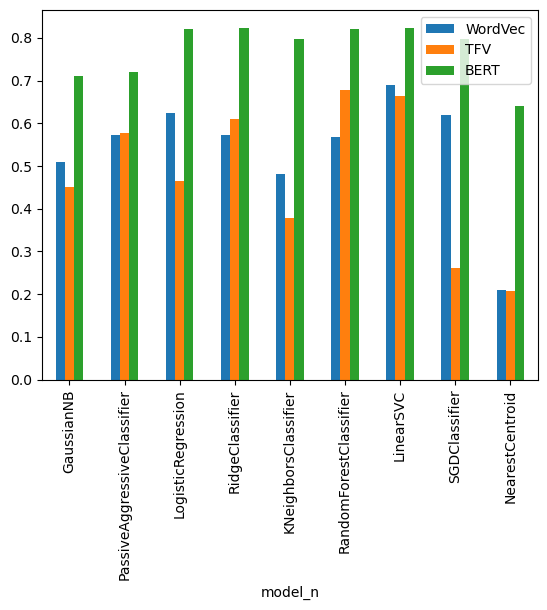

In [112]:
res_df=pd.DataFrame()
for n in [results_word,results_tf,results_bert]:
    rw= pd.DataFrame(n,columns=['model_n',n[0][2],'vec'])
    rw=rw.drop('vec',axis=1)
    rw=rw.set_index(['model_n'])
    res_df[n[0][2]]=rw[n[0][2]]

display(res_df)
plt.figure(figsize=(16,14))
res_df.plot.bar()# plt.hist(res_df1,density=True)
plt.show()    

### Выводы по итогам моделирования:
 - лучше всех из линейных моделей  обрабатывает вектора LinearSVC
 - в основном , векторизация TF показала хуже результы по сравнению с другими видами векторизации предложений
 - ниболее сложная ( двух этапная) модель векторизации ( BERT) показала наилучшие результаты. Метрика достугнута как на линейных моделях, так и на модели , постренной с помощью Catboost и на модели CNN

## Выводы

TF-IDF — это простой и широко используемый метод представления текста. Он присваивает вес словам в документе на основе их частоты в документе и обратной частоты в корпусе текстов. Идея заключается в том, что слова, которые часто встречаются в документе, но редко встречаются в корпусе текстов, скорее всего, важны для смысла документа. Этот подход обычно используется для поиска информации и классификации текстов.

Word2Vec, с другой стороны, — это более сложный алгоритм, который изучает векторные представления (вложения) слов на основе их контекста в большом массиве текста. Эти вложения показывают, как слова связаны семантически и грамматически. Их можно использовать для различных задач обработки естественного языка, таких как поиск аналогий и похожих слов и объединение текстов в группы.

В ходе работы были выполнены следующие этапы:
 - "леманизация" и отчистка : были выделены из текста только слова, искд.чены специальные символы, цифры, даты, стоп-слова ( в которые добавлены несколько слов еще), слова приведены к "первоначальной" форме
 - "токенизация" - выделение из текства отдельных слов
 - добавлены новые признаки: "количество слов в комменте" , "оценка эмоциональности" по 3 градациям
 - итоги всех совокупности данных а данных :
     - токсичных сообщений в данных почти в десять раз больше, чем положительных
     - сообщения , имеющие "негативную" эмоциональную окраску более токсичны
     - большинство токсичных сообщений имеют небольшую длину "значимых" слов
     - длинные сообщения ( с длиной более 500 слов) в большинстве токсичные
     - токсичные сообщения "пестрят" нецензурными словами
     - наиболее частые слова : 'article' - 71379,'page' -  5255 'talk' - 35392
 - используя модель Catboost и ее возможности работы с тексовыми данными были получены зна
 - была проведена "векторизация" данных с помощью моделей TfidVectorize , Word 2vec, BERT
 - проведена кроссвалидация на линейных моделях с частичной валидацией параметов
 - построены модели классификации с помощ моделй Word2vec и Catboost  В результате произведенных экспериментов были получены следующие результаты:
   -  наилучшей метрика F1 на test выборке оказалась у модели Catboost - 0.704.
 

Возможные улучшения программы  :
 - в силу недостаточности времени векторизация Bert не была полностью вписана в единый стиль. 
 - не реализован алгоритм работы с GPU (возможно, что после этого векличину train выборки можно будут увеличить и тогда метрика станет еще выше)
 - не реализорваны вариант с Auto моделемя Bert